# <center><font color = lightblue>Global AI Salaries Project</font></center>
Junho, 2024 

## <center>1. Definição do problema</center>
<br>

Neste projetos utilizaremos uma base de dados disponibilizada no Kaggle sobre salários dos profissionais da área de IA, Machine Learning e Data Science.

Neste notebook serão utilizadas técnicas para fazer a limpeza dos dados e o pré processamento para a utilização no **Microsoft Power BI**.

<br>

Importando a versão Python

In [1]:
from platform import python_version
print('Versão da linguaguem:', python_version())

Versão da linguaguem: 3.12.4


Instalação e importação dos pacostes

In [2]:
#!pip install -q -U watermark
#!pip install numpy
#!pip install pandas

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%reload_ext watermark
%watermark -a "Global AI Salaries Project - Porfolio Lucas" --iversions

Author: Global AI Salaries Project - Porfolio Lucas

numpy     : 1.26.4
pandas    : 2.2.2
seaborn   : 0.13.2
matplotlib: 3.8.4



## <br><center>2. Carregando os dados</center><br>

In [5]:
df = pd.read_csv('global_ai_ml_data_salaries.csv')

Vamos verificar o tamanho em linhas e colunas do dataset

In [6]:
df.shape

(20246, 11)

Vamos observar uma amostra dos dados.

In [7]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,Business Intelligence Developer,132000,USD,132000,US,0,US,M
1,2024,SE,FT,Business Intelligence Developer,90000,USD,90000,US,0,US,M
2,2024,EN,FT,Research Analyst,179000,USD,179000,US,0,US,M
3,2024,EN,FT,Research Analyst,112000,USD,112000,US,0,US,M
4,2024,SE,FT,Decision Scientist,170000,USD,170000,US,0,US,M


Aqui iremos verificar as informações do dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20246 entries, 0 to 20245
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           20246 non-null  int64 
 1   experience_level    20246 non-null  object
 2   employment_type     20246 non-null  object
 3   job_title           20246 non-null  object
 4   salary              20246 non-null  int64 
 5   salary_currency     20246 non-null  object
 6   salary_in_usd       20246 non-null  int64 
 7   employee_residence  20246 non-null  object
 8   remote_ratio        20246 non-null  int64 
 9   company_location    20246 non-null  object
 10  company_size        20246 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.7+ MB


Insight: Aqui observamos que o dataset possue 20246 linhas e como afirma o autor da fonte de dados, a pesquisa foi realizada com profissionais de nível global, mas não identificamos no dataset ID ou nome associado a cada profissional, <br><br>

Então podemos esperar que haja linhas duplicadas, mas não necessáriamente sejam dados duplicados, mas podem ser registros de profissionais diferentes.

## <br><center>3. Limpeza e Transformação dos dados</center><br>

Verificando se o dataset possue valores ausentes por quantidade.

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Agora iremos substituir as abreviações em cada coluna começando por 'experience_level'

In [10]:
# Podemos identificar 4 níveis de experiência
df.experience_level.unique()

array(['SE', 'EN', 'MI', 'EX'], dtype=object)

In [11]:
# Realizando a substituição
exp_level = {
            'SE': 'Senior',
            'EN': 'Junior',
            'MI': 'Intermediate',
            'EX': 'Executive' }

df['experience_level'] = df['experience_level'].replace(exp_level)

Utilizaremos a mesma técnica para as colunas 'employment_type'

In [12]:
# Podemos identificar 4 modalidades de regime de trabalho
df.employment_type.unique()

array(['FT', 'PT', 'CT', 'FL'], dtype=object)

In [13]:
# Realizando a substituição
emp_type = {
            'FT': 'Full-time',
            'PT': 'Part-time',
            'CT': 'Contract',
            'FL': 'Freelance' }

df['employment_type'] = df['employment_type'].replace(emp_type)

Agora iremos substituir as abreviações da coluna 'employee_residence' e 'company_location'

In [14]:
countries = {'US': 'United States', 
               'CA': 'Canada', 
               'DE': 'Germany', 
               'GB': 'United Kingdom', 
               'MX': 'Mexico', 
               'NL': 'Netherlands', 
               'AU': 'Australia', 
               'ZA': 'South Africa', 
               'IE': 'Ireland', 
               'TR': 'Turkey', 
               'IL': 'Israel', 
               'IN': 'India', 
               'FI': 'Finland', 
               'LU': 'Luxembourg', 
               'KE': 'Kenya', 
               'RS': 'Serbia', 
               'PT': 'Portugal', 
               'AR': 'Argentina', 
               'NZ': 'New Zealand', 
               'UA': 'Ukraine', 
               'LT': 'Lithuania', 
               'FR': 'France', 
               'ES': 'Spain', 
               'SE': 'Sweden', 
               'PL': 'Poland', 
               'DK': 'Denmark', 
               'LV': 'Latvia', 
               'GE': 'Georgia', 
               'AT': 'Austria', 
               'HR': 'Croatia', 
               'BR': 'Brazil', 
               'CH': 'Switzerland', 
               'AE': 'United Arab Emirates', 
               'GR': 'Greece', 
               'SA': 'Saudi Arabia', 
               'EG': 'Egypt', 
               'PH': 'Philippines', 
               'OM': 'Oman', 
               'BA': 'Bosnia and Herzegovina', 
               'IT': 'Italy', 
               'EE': 'Estonia', 
               'MT': 'Malta', 
               'LB': 'Lebnon', 
               'RO': 'Romania', 
               'HU': 'Hungary', 
               'VN': 'Vietnam', 
               'NG': 'Nigeria', 
               'CZ': 'Czech Republic', 
               'PK': 'Pakistan', 
               'UG': 'Uganda', 
               'CO': 'Colombia', 
               'SI': 'Slovenia', 
               'MU': 'Mauritius', 
               'AM': 'Armenia', 
               'TH': 'Thailand', 
               'KR': 'Korea', 
               'QA': 'Qatar', 
               'RU': 'Russian Federation', 
               'TN': 'Tunisia', 
               'GH': 'Ghana', 
               'BE': 'Belgium', 
               'AD': 'Andorra', 
               'EC': 'Ecuador', 
               'PE': 'Peru', 
               'MD': 'Moldova', 
               'NO': 'Norway',
               'UZ': 'Uzbekistan', 
               'JP': 'Japan', 
               'HK': 'Hong Kong', 
               'CF': 'Central African Republic', 
               'SG': 'Singapore', 
               'KW': 'Kuwait', 
               'CY': 'Cyprus', 
               'IR': 'Iran', 
               'AS': 'Somoa', 
               'CN': 'China', 
               'CR': 'Costa Rica', 
               'CL': 'Chile', 
               'PR': 'Puerto Rico', 
               'BO': 'Bolivia', 
               'DO': 'Dominican Republic', 
               'ID': 'Indonesia', 
               'MY': 'Malaysia', 
               'HN': 'Honduras', 
               'DZ': 'Algeria', 
               'IQ': 'Iraq', 
               'BG': 'Bulgaria', 
               'JE': 'Jersey',
               'BS': 'Bahamas',
               'GI': 'Gibraltar'}

df['employee_residence'] = df['employee_residence'].replace(countries)
df['company_location'] = df['company_location'].replace(countries)

Agora faremos a substituição da coluna que identifica a modalidade de Trabalho Presencial, Híbrido ou Remoto: 'remote_ratio'

In [15]:
# Realizando a substituição
remote = {
            0: 'No remote work',
            50: 'Hybrid',
            100: 'Fully remote' }

df['remote_ratio'] = df['remote_ratio'].replace(remote)

Agora a coluna 'company_size' que representa o tamanho da companhia

In [16]:
# Realizando a substituição
comp_size = {
            'S': '0-49',
            'M': '50-250',
            'L': '250+' }

df['company_size'] = df['company_size'].replace(comp_size)

Por ultimo iremos utilizar Feature Engineering para categorizar os diversos títulos atribuídos as profissões.

In [17]:
# 151 Tipos de profissões diferentes envolvendo dados.
df.job_title.value_counts().shape

(151,)

In [18]:
bi = ['Business', 'Intelligence', 'Business Intelligence', 'BI', 'Power BI' ]
ai = ['AI', 'Machine', 'Learning', 'ML',  'NLP Engineer', 'Vision', 'Autonomous']
da = ['Analyst', 'Analytics', 'Visualization' ]
de = ['Engineer', 'Modeler', 'ETL', 'Cloud', 'Robotics', 'Big']
ds = ['Scientist', 'Science', 'Research', 'Biologist', 'Robotics', 'Statistical', 'Specialist', 'Developer']
ar = ['Architect', 'Integration']
mn = ['Manager', 'Management', 'Head', 'Lead', 'Strategist', 'Product', 'Operations']

df['category_job'] = False

for index, row in df.iterrows():
    linha = row['job_title']

    if any(substring in linha for substring in bi)  & (df.loc[index, 'category_job'] == False):
        df.loc[index, 'category_job'] = 'Business Intelligence'

    elif any(substring in linha for substring in ai)  & (df.loc[index, 'category_job'] == False):
        df.loc[index, 'category_job'] = 'AI/ML'

    elif any(substring in linha for substring in de)  & (df.loc[index, 'category_job'] == False):
        df.loc[index, 'category_job'] = 'Data Engineering'

    elif any(substring in linha for substring in da)  & (df.loc[index, 'category_job'] == False):
        df.loc[index, 'category_job'] = 'Data Analysis'

    elif any(substring in linha for substring in ds)  & (df.loc[index, 'category_job'] == False):
        df.loc[index, 'category_job'] = 'Data Science'

    elif any(substring in linha for substring in ar)  & (df.loc[index, 'category_job'] == False):
        df.loc[index, 'category_job'] = 'Data Architecture'
        
    else:
        df.loc[index, 'category_job'] = 'Data Management'




C:\Users\Lucas\AppData\Local\Temp\ipykernel_8100\4061857720.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Business Intelligence' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[index, 'category_job'] = 'Business Intelligence'


In [19]:
# Conseguimos atribuir 7 categorias para 'job_title'
df.category_job.value_counts()

category_job
Data Science             6504
Data Engineering         5353
Data Analysis            3370
AI/ML                    2955
Business Intelligence    1050
Data Architecture         527
Data Management           487
Name: count, dtype: int64

Agora iremos categorizar de acordo com o continente.

In [20]:
africa = ['Kenya', 'South Africa', 'Egypt', 'Nigeria', 'Uganda', 'Mauritius', 'Tunisia', 'Ghana', 'Central African Republic', 'Algeria']

asia = ['Turkey', 'Israel', 'India', 'United Arab Emirates', 'Saudi Arabia', 'Philippines', 'Oman', 'Vietnam', 'Pakistan', 'Armenia',
        'Thailand', 'Korea', 'Qatar', 'Uzbekistan', 'Japan', 'Hong Kong', 'Singapore', 'Kuwait', 'Iran', 'China', 'Indonesia',
        'Malaysia', 'Iraq']

europe = ['Germany', 'United Kingdom', 'Netherlands', 'Ireland', 'Finland', 'Luxembourg', 'Serbia', 'Portugal', 'Ukraine', 'Lithuania', 
           'France', 'Spain', 'Sweden', 'Poland', 'Denmark', 'Latvia', 'Georgia', 'Austria', 'Croatia', 'Switzerland', 'Greece',
            'Bosnia and Herzegovina', 'Italy', 'Estonia', 'Malta', 'Lebnon', 'Romania', 'Hungary', 'Czech Republic',  'Slovenia',
            'Russian Federation', 'Belgium', 'Andorra', 'Moldova', 'Norway', 'Cyprus', 'Bulgaria', 'Jersey', 'Gibraltar']

north_america = ['United States', 'Canada']

central_america = ['Mexico', 'Costa Rica', 'Puerto Rico', 'Dominican Republic', 'Honduras', 'Bahamas']

south_america = ['Argentina', 'Brazil', 'Colombia', 'Ecuador', 'Peru', 'Chile', 'Bolivia']

oceania = ['Australia', 'New Zealand', 'Somoa']

def continents(col1, col2):
    for index, row in df.iterrows():
        linha = row[col1]

        if any(substring in linha for substring in africa):
            df.loc[index, col2] = 'Africa'
        
        elif any(substring in linha for substring in asia):
            df.loc[index, col2] = 'Asia'

        elif any(substring in linha for substring in europe):
            df.loc[index, col2] = 'Europe'

        elif any(substring in linha for substring in north_america):
            df.loc[index, col2] = 'North America'
        
        elif any(substring in linha for substring in central_america):
            df.loc[index, col2] = 'Central America'
        
        elif any(substring in linha for substring in south_america):
            df.loc[index, col2] = 'South America'
        
        else:
            df.loc[index, col2] = 'Oceania'

continents('employee_residence', 'employee_continent')
continents('company_location', 'company_continent')

Vamos agora procurar por Outliers na coluna 'salary_in_usd'

In [21]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'category_job',
       'employee_continent', 'company_continent'],
      dtype='object')

<Axes: xlabel='salary_in_usd', ylabel='experience_level'>

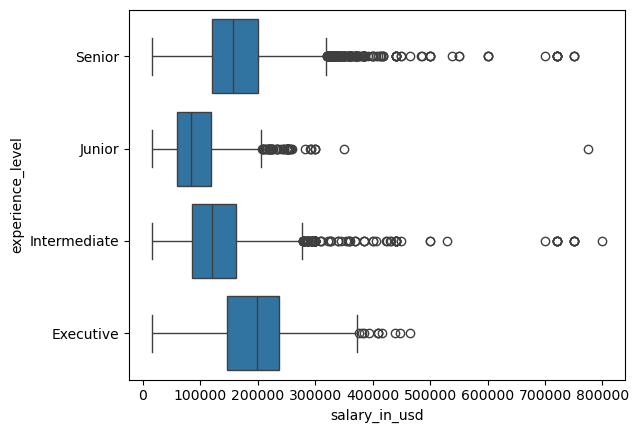

In [22]:
sns.boxplot( data = df, x = 'salary_in_usd', y = 'experience_level')

In [23]:
columns = ('employee_residence', 'job_title', 'experience_level', 'salary_in_usd', 'company_size')
df.loc[df['salary_in_usd'] > 600000, columns]

,employee_residence,job_title,experience_level,salary_in_usd,company_size
318,United States,Data Engineer,Senior,720000,50-250
709,United States,Analytics Engineer,Intermediate,720000,50-250
1744,United States,Research Scientist,Senior,720000,50-250
2327,United States,Analytics Engineer,Senior,720000,50-250
4105,United States,Analytics Engineer,Senior,720000,50-250
5855,United States,Machine Learning Scientist,Intermediate,720000,50-250
6014,United States,Data Scientist,Senior,720000,50-250
6516,Canada,AI Architect,Intermediate,800000,50-250
7359,Mexico,Data Analyst,Junior,774000,50-250
7367,United States,Analytics Engineer,Intermediate,720000,50-250


Vamos fazer uma verificação nos dados estatísticos do nível de junior para melhor compreender o possível Outlier no Cargo de Data Analyst.

In [24]:
df.loc[df['experience_level'] == 'Junior', :].salary_in_usd.describe()

count      1676.000000
mean      93929.156921
std       51319.212332
min       15000.000000
25%       60000.000000
50%       83300.000000
75%      118000.000000
max      774000.000000
Name: salary_in_usd, dtype: float64

Foi verificado que há uma grande chance desse registro ter sido inserido incorretamente, pois o valor do salário é muito discrepante para o nível de experiência. <br>

Assim o valor será descartado para não influênciar nos cálculos estatísticos.

In [25]:
df.drop(index = 7359, inplace = True)

## <center>4. Salvando conjunto de dados</center>

In [26]:
# df.to_csv('global_ai_ml_data_salaries_clean.csv', index = False)

In [31]:
df.employee_continent.value_counts()

employee_continent
North America      18462
Europe              1400
Asia                 160
Oceania               73
Africa                64
South America         61
Central America       25
Name: count, dtype: int64